<a href="https://colab.research.google.com/github/Incutti/TSopInfo_TPEncuesta/blob/main/TpEncuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import pandas as pd
import numpy as np

In [ ]:
csv = pd.read_csv("./Respuestas encuesta.csv")
csvColumnas = list(csv.columns)

In [19]:
def arreglar_edades(columnas):
  columnas = str(columnas)
  if columnas == "55":
    columnas ="55 o más"
  elif columnas == "15 - 24":
    columnas = "13 - 24"

  return columnas



def arreglar_familias(columnas):
  columnas = str(columnas)
  if columnas == "+5":
    columnas = "5 o más"

  return columnas



def arreglar_frecuencia_cine(columnas):
  columnas = str(columnas)
  if columnas == "Poco":
    columnas = "Cada 6 meses"
  elif columnas == "No muy seguido":
    columnas = "Cada 3 meses."
  elif columnas == "Frecuentemente":
    columnas = "Una o más veces al mes."

  return columnas



def arreglar_preferencias_contenido(columnas):
  columnas = str(columnas)
  if columnas == "Peliculas":
    columnas = "Películas"

  return columnas



def arreglar_preferencias_lugar(columnas):
  columnas = str(columnas)
  if columnas == "Quedarse en casa":
    columnas = "Quedarme en casa"

  return columnas



def arreglar_tilde_si(columnas):
  columnas = str(columnas)
  if columnas == "Si":
    columnas = "Sí"

  return columnas



def arreglar_ambos(columnas):
  columnas = str(columnas)
  if columnas == "Ambos similares":
    columnas = "Ambos"

  return columnas



def arreglar_ventajas_cine(columnas):
  columnas = str(columnas)
  if ("todas las anteriores" in columnas) or ("La calidad de imagen" in columnas):
    columnas = ""

  return columnas

In [20]:
csv["¿Qué edad tiene?"] = csv["¿Qué edad tiene?"].apply(arreglar_edades)
csv["¿Cuánta gente vive en su casa?"] = csv["¿Cuánta gente vive en su casa?"].apply(arreglar_familias)
csv["¿Con qué frecuencia aproximadamente va al cine?"] = csv["¿Con qué frecuencia aproximadamente va al cine?"].apply(arreglar_frecuencia_cine)
csv["¿Qué prefiere ver?"] = csv["¿Qué prefiere ver?"].apply(arreglar_preferencias_contenido)
csv["¿Prefiere quedarse en casa viendo una serie/película o ir al cine?"] = csv["¿Prefiere quedarse en casa viendo una serie/película o ir al cine?"].apply(arreglar_preferencias_lugar)
csv["¿Realiza otros gastos además de la entrada de cine (por ejemplo: pochoclos, cena, merchandising, etc.)?"] = csv["¿Realiza otros gastos además de la entrada de cine (por ejemplo: pochoclos, cena, merchandising, etc.)?"].apply(arreglar_tilde_si)
csv["En caso de haber respondido que sí en la pregunta anterior, ¿Piensa que este gasto extra hace que usted vaya menos al cine?"] = csv["En caso de haber respondido que sí en la pregunta anterior, ¿Piensa que este gasto extra hace que usted vaya menos al cine?"].apply(arreglar_tilde_si)
csv["Desde que aparecieron o se pusieron de moda los servicios de streaming, ¿Ve menos películas en el cine?"] = csv["Desde que aparecieron o se pusieron de moda los servicios de streaming, ¿Ve menos películas en el cine?"].apply(arreglar_tilde_si)
csv["¿Cree que los servicios de streaming reemplazarán al cine?"] = csv["¿Cree que los servicios de streaming reemplazarán al cine?"].apply(arreglar_tilde_si)
csv["¿Qué ventaja considera más importante al ver películas en el cine?"] = csv["¿Qué ventaja considera más importante al ver películas en el cine?"].apply(arreglar_ventajas_cine)
csv["¿Cuál considera que tiene una mejor relación calidad-precio?"] = csv["¿Cuál considera que tiene una mejor relación calidad-precio?"].apply(arreglar_ambos)

In [21]:
csv.to_csv('./respuestasEncuestaModificadas.csv')

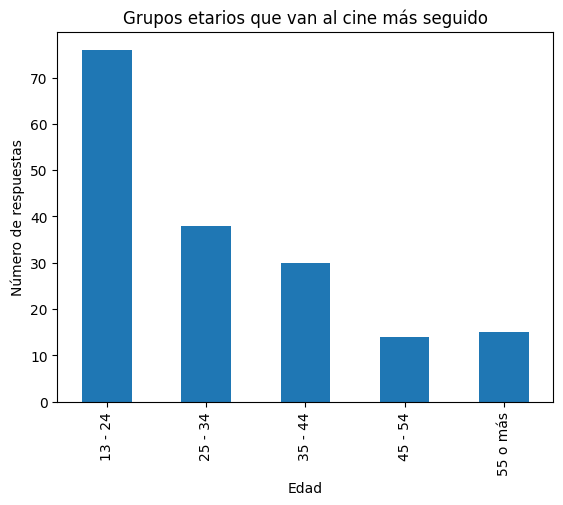

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

csv = pd.read_csv('respuestasEncuestaModificadas.csv')

filtered_data = csv[
    (csv['¿Con qué frecuencia aproximadamente va al cine?'] == 'Cada 3 meses.') |
    (csv['¿Con qué frecuencia aproximadamente va al cine?'] == 'Una o más veces al mes.')
]

grouped_data = filtered_data.groupby('¿Qué edad tiene?').size()

fig, ax = plt.subplots()
grouped_data.plot(kind='bar', ax=ax)

ax.set_xlabel('Edad')
ax.set_ylabel('Número de respuestas')
ax.set_title('Grupos etarios que van al cine más seguido')

plt.show()

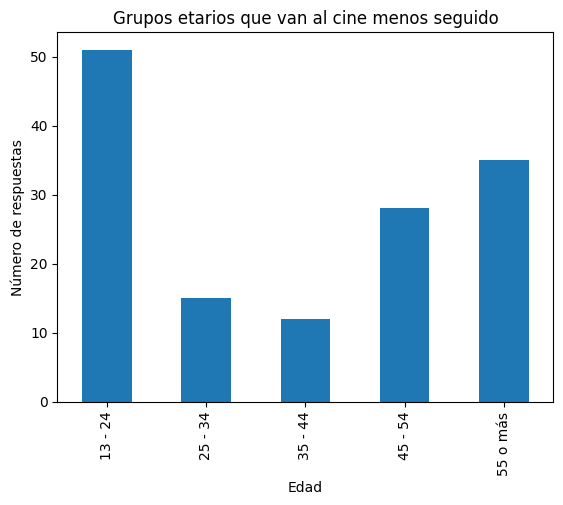

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

csv = pd.read_csv('respuestasEncuestaModificadas.csv')

filtered_data = csv[
    (csv['¿Con qué frecuencia aproximadamente va al cine?'] == 'Cada 6 meses') |
    (csv['¿Con qué frecuencia aproximadamente va al cine?'] == 'No voy al cine')
]

grouped_data = filtered_data.groupby('¿Qué edad tiene?').size()

fig, ax = plt.subplots()
grouped_data.plot(kind='bar', ax=ax)

ax.set_xlabel('Edad')
ax.set_ylabel('Número de respuestas')
ax.set_title('Grupos etarios que van al cine menos seguido')

plt.show()

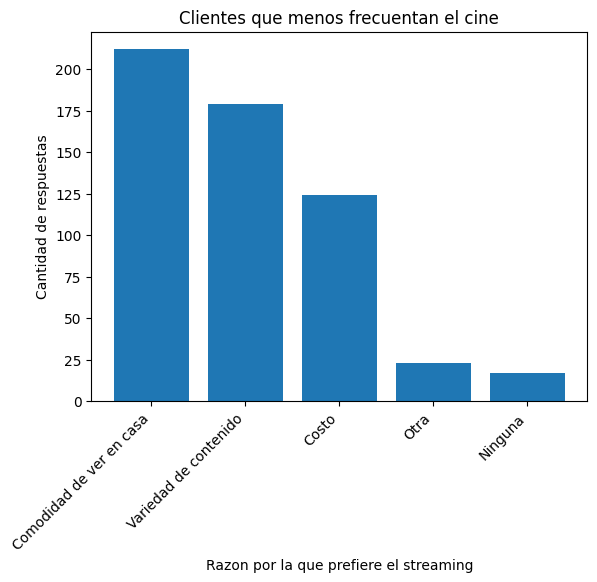

In [24]:
import matplotlib.pyplot as plt
import pandas as pd


csv = pd.read_csv('respuestasEncuestaModificadas.csv')


filtered_data = csv[
    (csv['¿Qué ventaja considera más importante al ver películas en servicios de streaming?'] == 'Cada 6 meses.') |
    (csv['¿Qué ventaja considera más importante al ver películas en servicios de streaming?'] == 'No voy al cine.')
]


ventajas = ['Comodidad de ver en casa', 'Variedad de contenido', 'Costo', 'Otra', 'Ninguna']
count_dict = {ventaja: 0 for ventaja in ventajas}


for _, row in csv.iterrows():
    opciones_seleccionadas = row['¿Qué ventaja considera más importante al ver películas en servicios de streaming?'].split(', ')
    for opcion in opciones_seleccionadas:
        if opcion in count_dict:
            count_dict[opcion] += 1


fig, ax = plt.subplots()
ax.bar(count_dict.keys(), count_dict.values())


ax.set_xlabel('Razon por la que prefiere el streaming')
ax.set_ylabel('Cantidad de respuestas')
ax.set_title('Clientes que menos frecuentan el cine')

plt.xticks(rotation=45, ha='right')

plt.show()

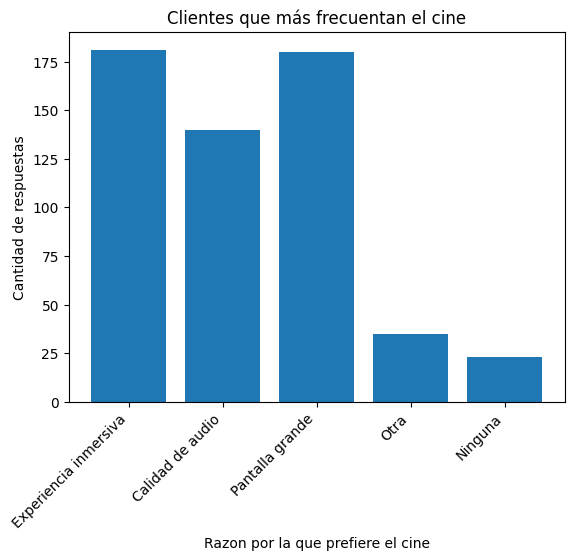

In [25]:
import matplotlib.pyplot as plt
import pandas as pd


csv = pd.read_csv('respuestasEncuestaModificadas.csv')


filtered_data = csv[
    (csv['¿Con qué frecuencia aproximadamente va al cine?'] == 'Cada 3 meses.') |
    (csv['¿Con qué frecuencia aproximadamente va al cine?'] == 'Una o más veces al mes.')
]


ventajas = ['Experiencia inmersiva', 'Calidad de audio', 'Pantalla grande', 'Otra', 'Ninguna']
count_dict = {ventaja: 0 for ventaja in ventajas}



for _, row in csv.iterrows():
    opciones_seleccionadas = str(row['¿Qué ventaja considera más importante al ver películas en el cine?']).split(', ')
    for opcion in opciones_seleccionadas:
        if opcion in count_dict:
            count_dict[opcion] += 1


fig, ax = plt.subplots()
ax.bar(count_dict.keys(), count_dict.values())


ax.set_xlabel('Razon por la que prefiere el cine')
ax.set_ylabel('Cantidad de respuestas')
ax.set_title('Clientes que más frecuentan el cine')

plt.xticks(rotation=45, ha='right')

plt.show()